In [412]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [413]:
data = pd.read_csv("performance.csv")
df=pd.DataFrame(data)

In [414]:
print(df)

   percentage educational_resources parents_education  personality passion  \
0          85                  good          graduate  extroverted     yes   
1          78          satisfactory     undergraduate   ambiverted      no   
2          92                  poor               PhD  introverted     yes   
3          87                  good          graduate  extroverted      no   
4          80          satisfactory     undergraduate   ambiverted     yes   
5          95                  good               PhD  introverted     yes   
6          88          satisfactory          graduate  extroverted      no   
7          75                  poor     undergraduate   ambiverted      no   
8          89                  good          graduate  extroverted     yes   
9          82          satisfactory     undergraduate  introverted     yes   

   ott_time  sm_time  travel_time  eduvids_time  game_time  extra_time  \
0       2.0      1.0          0.5           3.0        1.0         

In [415]:
null_values=df.isnull()
print(null_values)

   percentage  educational_resources  parents_education  personality  passion  \
0       False                  False              False        False    False   
1       False                  False              False        False    False   
2       False                  False              False        False    False   
3       False                  False              False        False    False   
4       False                  False              False        False    False   
5       False                  False              False        False    False   
6       False                  False              False        False    False   
7       False                  False              False        False    False   
8       False                  False              False        False    False   
9       False                  False              False        False    False   

   ott_time  sm_time  travel_time  eduvids_time  game_time  extra_time  \
0     False    False        False 

In [416]:
total_null_values=df.isnull().sum()
print(total_null_values)

percentage               0
educational_resources    0
parents_education        0
personality              0
passion                  0
ott_time                 0
sm_time                  0
travel_time              0
eduvids_time             0
game_time                0
extra_time               0
ai_usage                 0
dtype: int64


In [417]:
# Map educational_resources values to numerical representations
# convert categorical variable to numerical
df['passion'] = df['passion'].apply(lambda x: 1 if x =='yes' else 0)
print(df)

   percentage educational_resources parents_education  personality  passion  \
0          85                  good          graduate  extroverted        1   
1          78          satisfactory     undergraduate   ambiverted        0   
2          92                  poor               PhD  introverted        1   
3          87                  good          graduate  extroverted        0   
4          80          satisfactory     undergraduate   ambiverted        1   
5          95                  good               PhD  introverted        1   
6          88          satisfactory          graduate  extroverted        0   
7          75                  poor     undergraduate   ambiverted        0   
8          89                  good          graduate  extroverted        1   
9          82          satisfactory     undergraduate  introverted        1   

   ott_time  sm_time  travel_time  eduvids_time  game_time  extra_time  \
0       2.0      1.0          0.5           3.0        1

In [418]:
mapping_dict1 = {'good': 1, 'poor': 0, 'satisfactory': 0.5}

# Apply the mapping to the DataFrame column
df['educational_resources'] = df['educational_resources'].map(mapping_dict1)


In [419]:
mapping_dict2 = {'extroverted': 0, 'introverted': 1, 'ambiverted': 0.5}

# Apply the mapping to the DataFrame column
df['personality'] = df['personality'].map(mapping_dict2)

In [420]:
mapping_dict3 = {'regular': 0, 'never': 1, 'occasional': 0.5}

# Apply the mapping to the DataFrame column
df['ai_usage'] = df['ai_usage'].map(mapping_dict3)

In [421]:
mapping_dict4 = {'below10': 0.20, '10': 0.22, '12': 0.25, 'undergraduate': 0.5, 'graduate': 0.65, 'PhD': 0.75, }

# Apply the mapping to the DataFrame column
df['parents_education'] = df['parents_education'].map(mapping_dict4)

In [422]:
df['study_time'] = 9-df['ott_time']-df['sm_time']-df['travel_time']+df['eduvids_time']-df['game_time']-df['extra_time']

In [423]:
# Print the modified DataFrame
print(df)

   percentage  educational_resources  parents_education  personality  passion  \
0          85                    1.0               0.65          0.0        1   
1          78                    0.5               0.50          0.5        0   
2          92                    0.0               0.75          1.0        1   
3          87                    1.0               0.65          0.0        0   
4          80                    0.5               0.50          0.5        1   
5          95                    1.0               0.75          1.0        1   
6          88                    0.5               0.65          0.0        0   
7          75                    0.0               0.50          0.5        0   
8          89                    1.0               0.65          0.0        1   
9          82                    0.5               0.50          1.0        1   

   ott_time  sm_time  travel_time  eduvids_time  game_time  extra_time  \
0       2.0      1.0          0.5 

array([[<Axes: title={'center': 'percentage'}>,
        <Axes: title={'center': 'educational_resources'}>],
       [<Axes: title={'center': 'parents_education'}>,
        <Axes: title={'center': 'passion'}>],
       [<Axes: title={'center': 'ai_usage'}>,
        <Axes: title={'center': 'study_time'}>]], dtype=object)

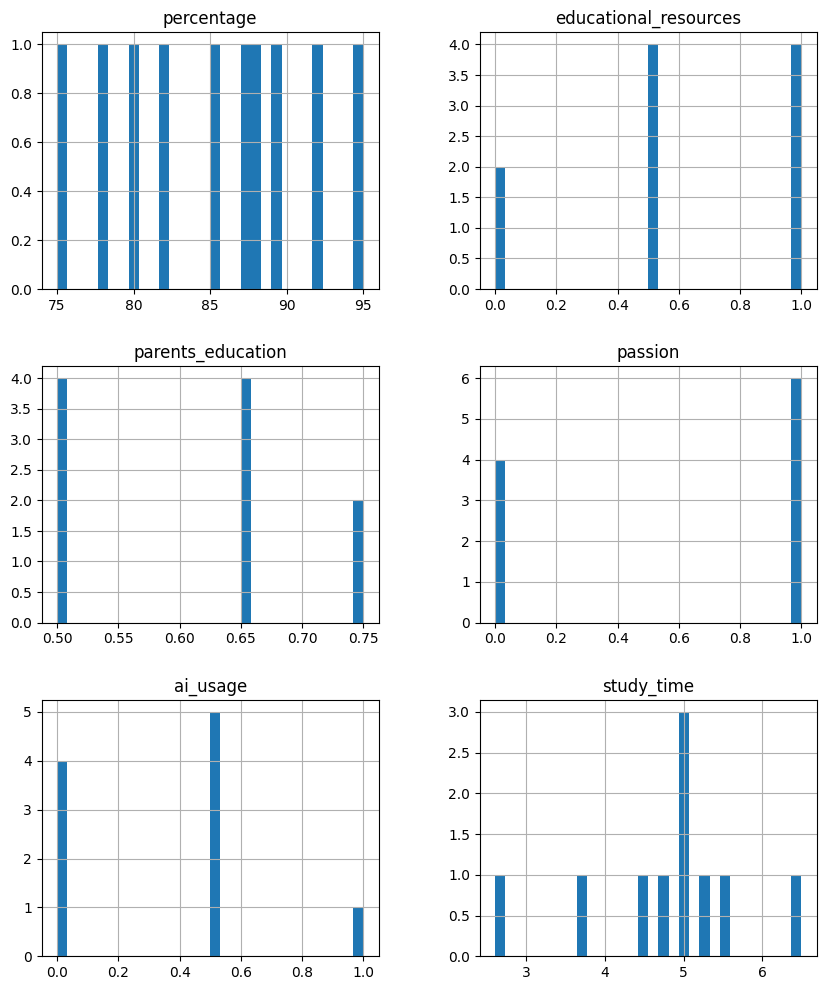

In [424]:
import matplotlib.pyplot as plt
df[  ['percentage', 'educational_resources', 'parents_education', 'passion', 'ai_usage', 'study_time']].hist(bins=30, figsize=(10,12))

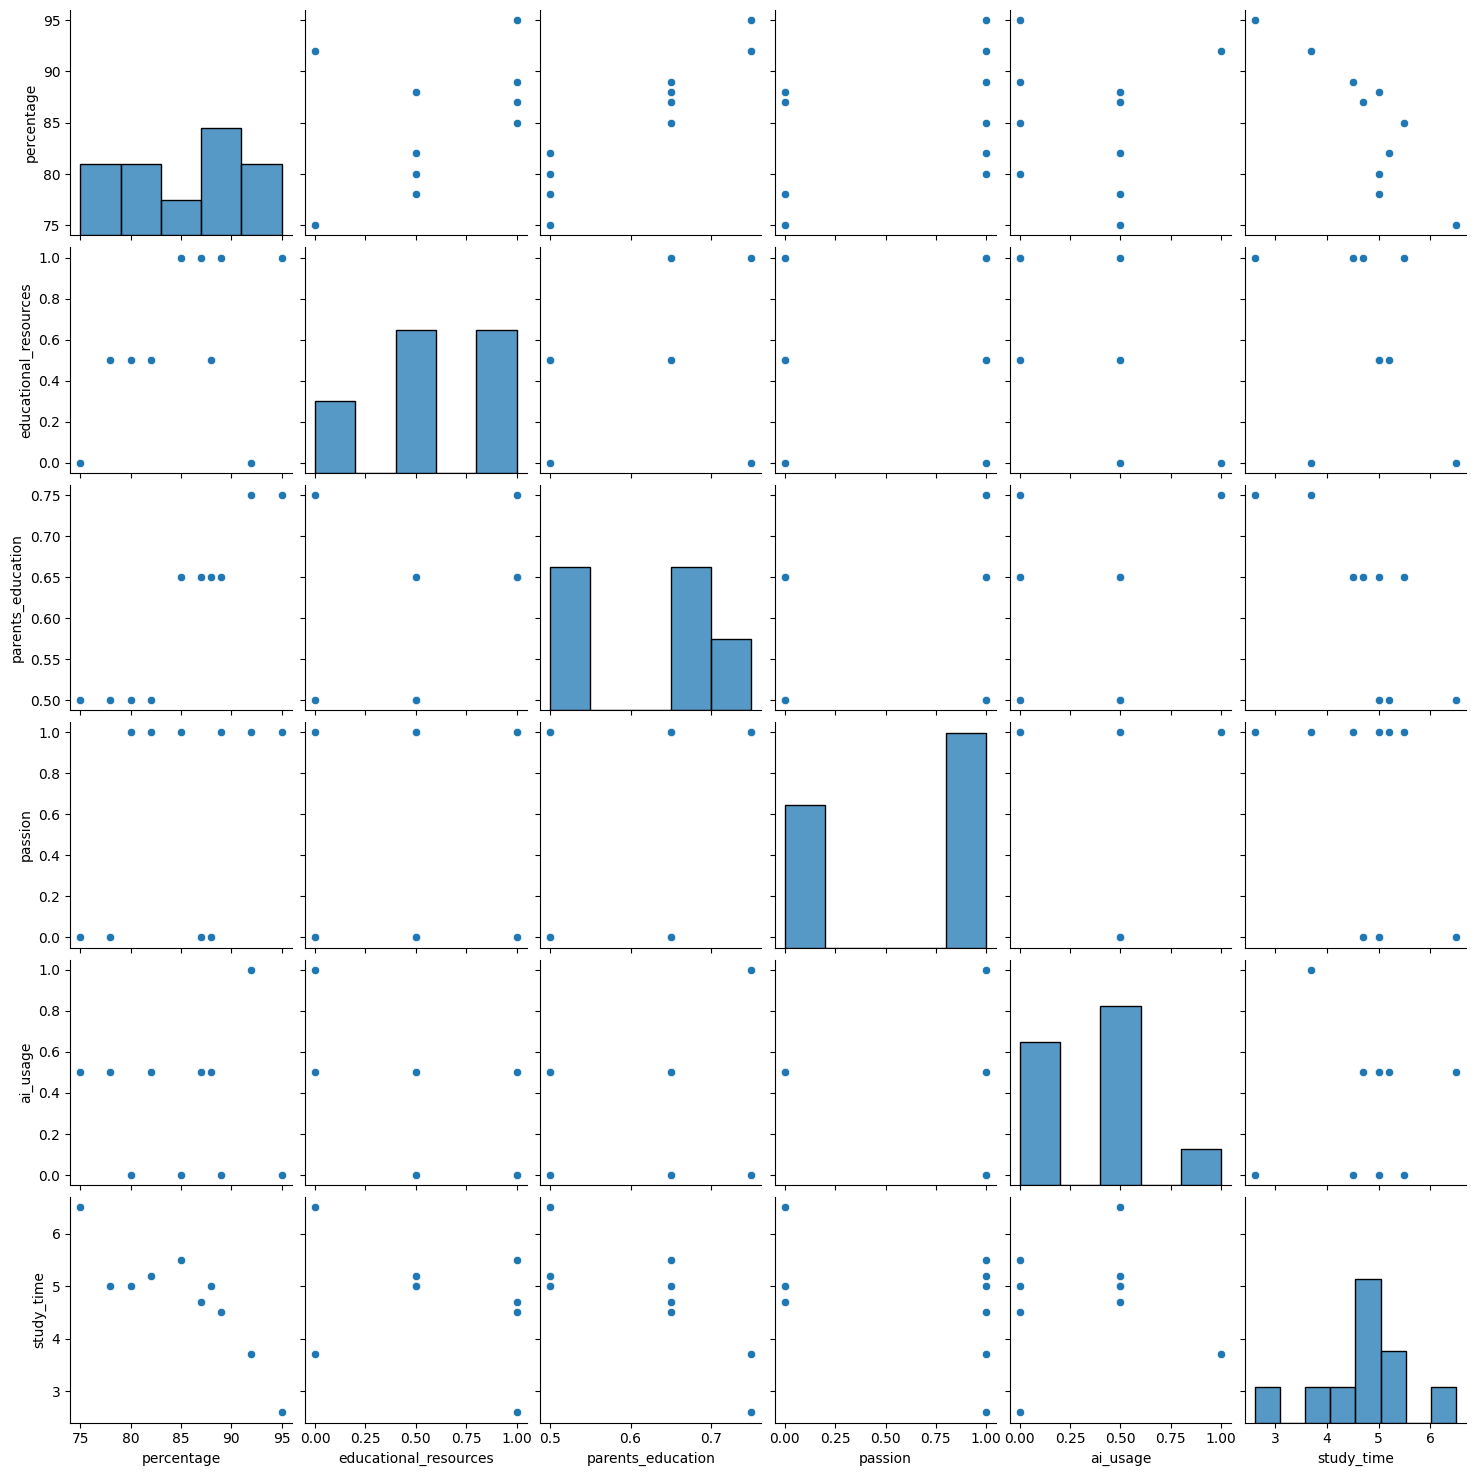

In [425]:
import seaborn as sns
# plot pairplot
sns.pairplot(df[  ['percentage', 'educational_resources', 'parents_education', 'passion', 'ai_usage', 'study_time']])

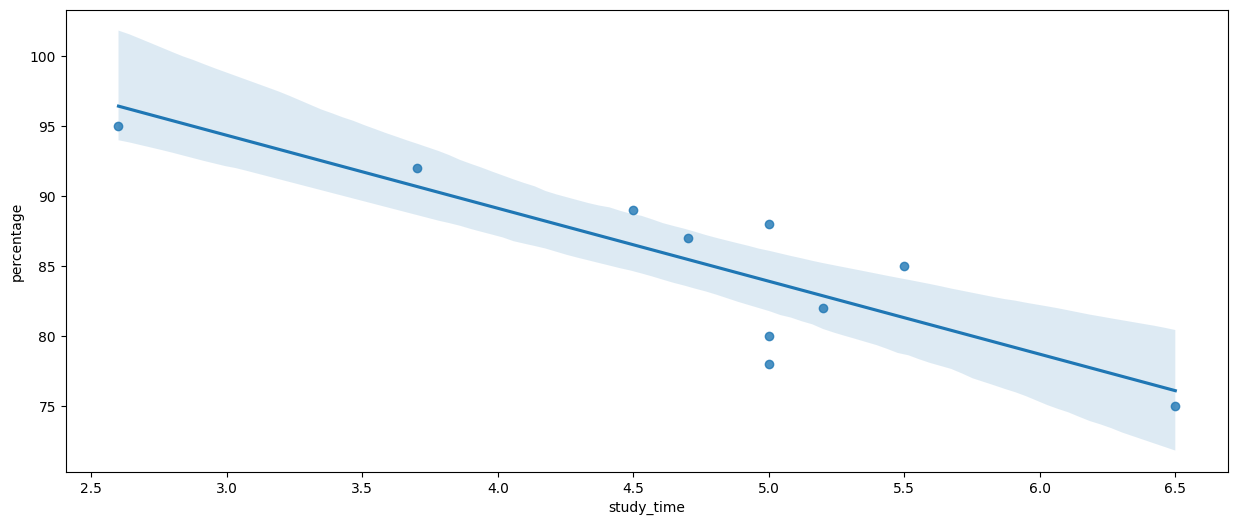

In [426]:
#regplot=regression plotting
plt.figure(figsize = (15, 6))
sns.regplot(x = 'study_time', y = 'percentage', data = df)
plt.show()

In [427]:
df.corr()

,percentage,educational_resources,parents_education,personality,passion,ott_time,sm_time,travel_time,eduvids_time,game_time,extra_time,ai_usage,study_time
percentage,1.000000,0.418187,0.942573,0.102200,0.421330,0.824089,-0.932850,-0.536448,-0.418187,-0.795233,0.922574,-0.044194,-0.858692
educational_resources,0.418187,1.000000,0.317008,-0.450443,0.218218,0.292174,-0.391256,-0.115400,0.071429,-0.121988,0.385606,-0.709566,-0.329352
parents_education,0.942573,0.317008,1.000000,0.012417,0.294753,0.716810,-0.839742,-0.510134,-0.179178,-0.768936,0.918541,0.048324,-0.746999
personality,0.102200,-0.450443,0.012417,1.000000,0.393179,0.338420,-0.148411,-0.515086,-0.675664,-0.439587,0.275513,0.319619,-0.417094
passion,0.421330,0.218218,0.294753,0.393179,1.000000,0.701334,-0.639594,-0.849333,-0.490990,-0.559017,0.446844,-0.382546,-0.437114
ott_time,0.824089,0.292174,0.716810,0.338420,0.701334,1.000000,-0.906498,-0.815337,-0.605218,-0.879160,0.831383,-0.268293,-0.861322
sm_time,-0.932850,-0.391256,-0.839742,-0.148411,-0.639594,-0.906498,1.000000,0.663367,0.562860,0.765887,-0.858675,0.144398,0.852477
travel_time,-0.536448,-0.115400,-0.510134,-0.515086,-0.849333,-0.815337,0.663367,1.000000,0.430128,0.836111,-0.675714,0.263605,0.580079
eduvids_time,-0.418187,0.071429,-0.179178,-0.675664,-0.490990,-0.605218,0.562860,0.430128,1.000000,0.447288,-0.385606,-0.125218,0.680301
game_time,-0.795233,-0.121988,-0.768936,-0.439587,-0.559017,-0.879160,0.765887,0.836111,0.447288,1.000000,-0.847784,0.095044,0.749968


<Axes: >

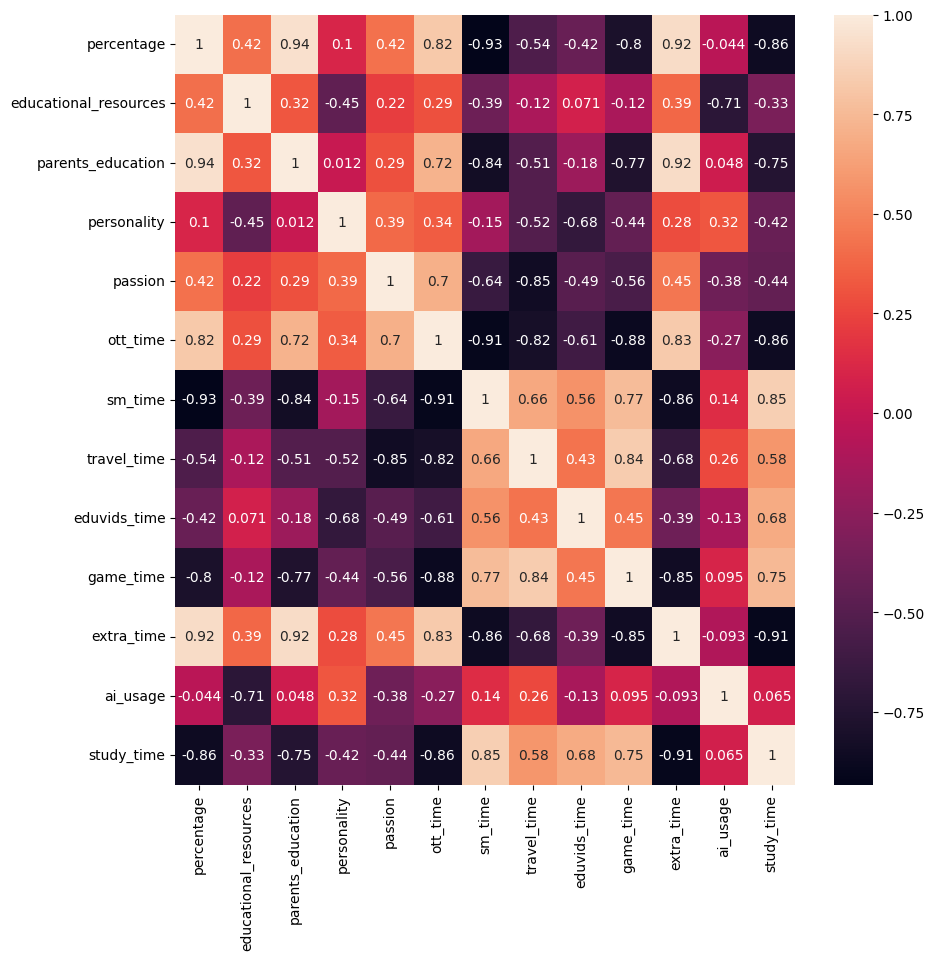

In [428]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [429]:
df.columns

Index(['percentage', 'educational_resources', 'parents_education',
       'personality', 'passion', 'ott_time', 'sm_time', 'travel_time',
       'eduvids_time', 'game_time', 'extra_time', 'ai_usage', 'study_time'],
      dtype='object')

In [430]:
X=df.drop(columns=['percentage'])
y=df['percentage']

In [431]:
print(X)

   educational_resources  parents_education  personality  passion  ott_time  \
0                    1.0               0.65          0.0        1       2.0   
1                    0.5               0.50          0.5        0       1.5   
2                    0.0               0.75          1.0        1       3.0   
3                    1.0               0.65          0.0        0       2.0   
4                    0.5               0.50          0.5        1       2.5   
5                    1.0               0.75          1.0        1       3.5   
6                    0.5               0.65          0.0        0       2.0   
7                    0.0               0.50          0.5        0       1.5   
8                    1.0               0.65          0.0        1       3.0   
9                    0.5               0.50          1.0        1       2.0   

   sm_time  travel_time  eduvids_time  game_time  extra_time  ai_usage  \
0      1.0          0.5           3.0        1.0        

In [432]:
print(y)

0    85
1    78
2    92
3    87
4    80
5    95
6    88
7    75
8    89
9    82
Name: percentage, dtype: int64


In [433]:
X.shape

(10, 12)

In [434]:
y.shape

(10,)

In [435]:
import numpy as np
#coverting in numpy array for ease to use
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [436]:
y = y.reshape(-1,1)

In [437]:
X

array([[1.  , 0.65, 0.  , 1.  , 2.  , 1.  , 0.5 , 3.  , 1.  , 2.  , 0.  ,
        5.5 ],
       [0.5 , 0.5 , 0.5 , 0.  , 1.5 , 1.5 , 1.  , 2.5 , 1.5 , 1.  , 0.5 ,
        5.  ],
       [0.  , 0.75, 1.  , 1.  , 3.  , 0.5 , 0.3 , 2.  , 0.5 , 3.  , 1.  ,
        3.7 ],
       [1.  , 0.65, 0.  , 0.  , 2.  , 1.  , 0.8 , 2.5 , 1.  , 2.  , 0.5 ,
        4.7 ],
       [0.5 , 0.5 , 0.5 , 1.  , 2.5 , 1.  , 0.5 , 2.  , 1.  , 1.  , 0.  ,
        5.  ],
       [1.  , 0.75, 1.  , 1.  , 3.5 , 0.5 , 0.2 , 2.  , 0.2 , 4.  , 0.  ,
        2.6 ],
       [0.5 , 0.65, 0.  , 0.  , 2.  , 1.  , 1.  , 2.5 , 1.  , 1.5 , 0.5 ,
        5.  ],
       [0.  , 0.5 , 0.5 , 0.  , 1.5 , 1.8 , 0.7 , 3.  , 1.  , 0.5 , 0.5 ,
        6.5 ],
       [1.  , 0.65, 0.  , 1.  , 3.  , 0.7 , 0.5 , 2.5 , 0.8 , 2.  , 0.  ,
        4.5 ],
       [0.5 , 0.5 , 1.  , 1.  , 2.  , 1.2 , 0.6 , 2.  , 1.  , 1.  , 0.5 ,
        5.2 ]], dtype=float32)

In [438]:
y.shape

(10, 1)

In [439]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)

(8, 12)
(2, 12)


In [440]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [441]:
#check accuracy
regresssion_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

-20.05423567030165

In [442]:
#prediction value
y_predict = regression_model_sklearn.predict(X_test)

In [443]:
k = X_test.shape[1]
n = len(X_test)
n

2

In [444]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
#root mean square, mean square error, mean absolute error, coefficient of determination - r square

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 6.883 
MSE = 47.372032 
MAE = 5.7718697 
R2 = -20.05423567030165 
Adjusted R2 = 2.9140214245728773
